**Brian Blaylock**  
**February 6, 2019**

# Read HRRR-GLM Lightning Hit Rates

- **How do distributions different for other regions? (western USA?)**
- Is Reflectivity a better predictor (probably not, since lightning is generally the area of strongest reflectivity. The only thing this would do is expand the radius of convective areas.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import os


import os
SAVEDIR = '/uufs/chpc.utah.edu/common/home/u0553130/public_html/PhD/HRRR_GOES/GLM_hit_rate/'
if not os.path.exists(SAVEDIR):
    os.makedirs(SAVEDIR)
    
import matplotlib as mpl
#mpl.rcParams['figure.figsize'] = [15,15]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 15
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100

In [422]:
months = range(5,11)

hour = 0

domains = ['HRRR', 'West', 'Central', 'East', 'Utah']

data_dict = {}
for d in domains:
    data_dict[d] = {}
    for m in months:
        DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
        FILE = 'GLM_in_HRRR_%s_2018_m%02d_h%02d.csv' % (d, m, hour)
        if os.path.exists(DIR+FILE):
            data_dict[d][m] = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None)        

print(data_dict.keys())

dict_keys(['HRRR', 'West', 'Central', 'East', 'Utah'])


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [423]:
print(data_dict['HRRR'].keys())
print(data_dict['HRRR'][5].dtype.names)

dict_keys([5, 6, 7, 8, 9, 10])
('DATE', 'GLM_FLASH_COUNT', 'NUM_FILES', 'EXPECTED_FILES', 'F00', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18')


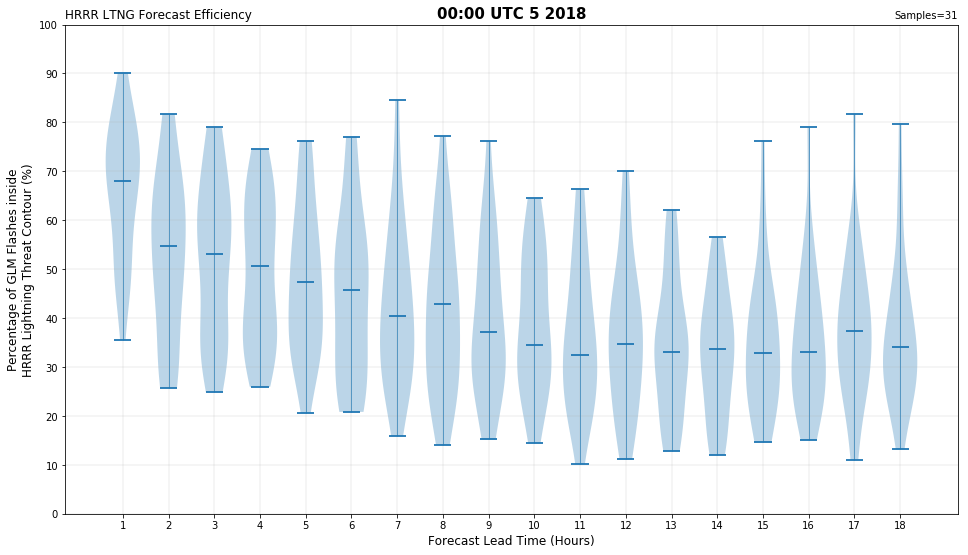

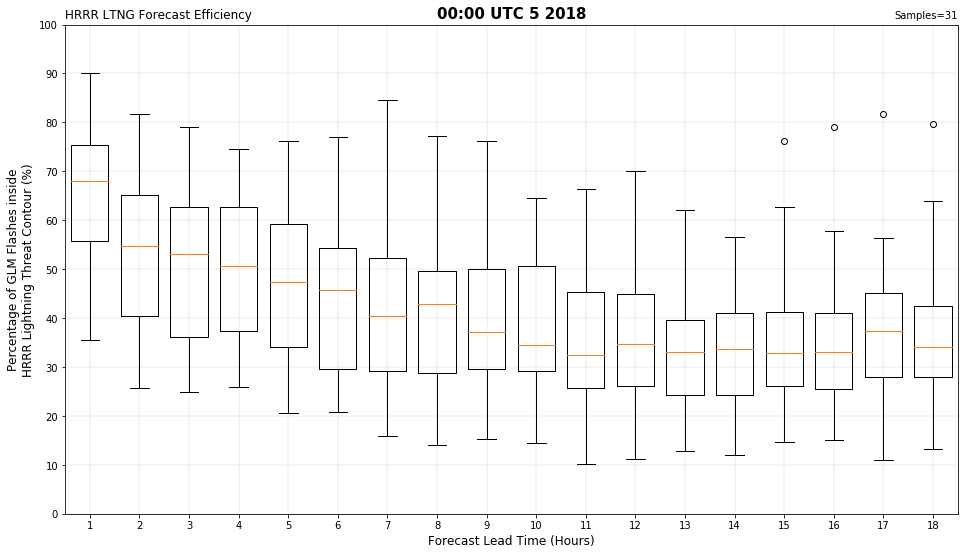

In [307]:
MONTH = 5
DOMAIN = 'HRRR'

plt.figure(1, figsize=(16,9))
boxes = [data_dict[DOMAIN][MONTH]['F%02d'%f]*100 for f in range(1,19)]
boxes = [i[~np.isnan(i)] for i in boxes] # filter out nan values
data = np.array(boxes)
v = plt.violinplot(boxes, showmedians=True, showmeans=False, widths=.75);
#for vp in v['bodies']:
#    vp.set_facecolor('k')
#    vp.set_edgecolor('k')
#    vp.set_alpha(0.5)
#v['cbars'].set_color('k');
v['cbars'].set_linewidth(.8);
v['cbars'].set_alpha(.8);
#v['cmaxes'].set_color('k')
#v['cmins'].set_color('k')
#v['cmedians'].set_color('k')
#for i in range(len(a['DATE'])):
#    plt.plot(range(1,19), data[:,i])
plt.title('HRRR LTNG Forecast Efficiency', loc='left', fontsize=12)
plt.title('%02d:00 UTC %s 2018' % (hour, MONTH), loc='center', fontweight='semibold')
plt.title('Samples=%s' % len(data_dict[DOMAIN][MONTH]['DATE']), loc='right', fontsize=10)
plt.xlabel('Forecast Lead Time (Hours)')
plt.ylabel('Percentage of GLM Flashes inside\nHRRR Lightning Threat Contour (%)')
plt.ylim([0,100])
plt.yticks(range(0,101,10))
plt.xticks(range(1,19))
plt.grid()
plt.savefig(SAVEDIR + "HRRR_GLM_%s_m%%02d_h%%02d" % (DOMAIN, MONTH, hour))

In [313]:
[data_dict['HRRR'][MONTH]['GLM_FLASH_COUNT'] for MONTH in data_dict['HRRR'].keys()]

[array([   nan, 18683., 47402., 10654., 10541.,  8403., 15311.,  8930.,
        10390., 11420., 22519.,  4729.,  9566., 13178., 46712., 56138.,
        33798., 40081., 38257., 30891., 55955., 22949., 38865., 61649.,
        46543., 53677., 33607., 38751., 37729., 47831.,    nan]),
 array([42165., 49963., 51663., 62604., 18130., 17431., 34601., 41890.,
        41666., 34661., 50142., 51370.,    nan, 50328., 36476., 26790.,
           nan, 36633., 37806., 54504., 41933., 26758., 53386., 39315.,
        54393., 59764., 57594., 40098., 63276., 42147.]),
 array([73791., 63663., 74503., 53228., 51638., 71790., 57018., 39245.,
        41812., 29110., 37117., 57397., 61320., 49583., 58641., 54492.,
        65621., 41777., 45214., 38237., 50007., 29807., 56426., 32417.,
        30240., 41159.,    nan, 71368., 61133., 46141., 41850.]),
 array([24265, 36453, 30942, 46656, 20474, 55032, 54560, 69541, 66314,
        58775, 49776, 38121, 31137, 31520, 54689, 41558, 63407, 51845,
        55947, 46718

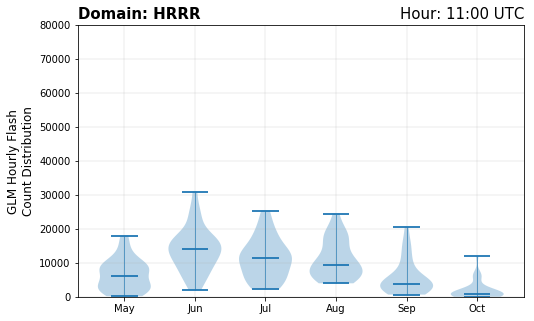

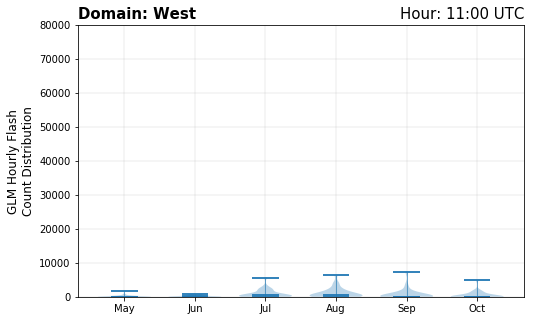

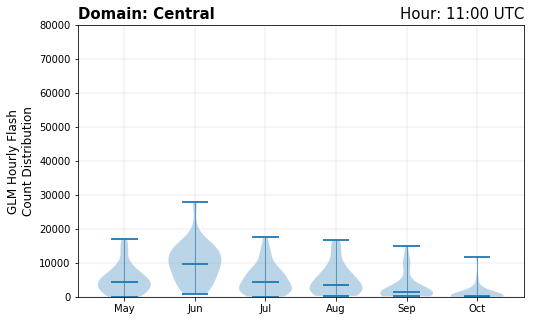

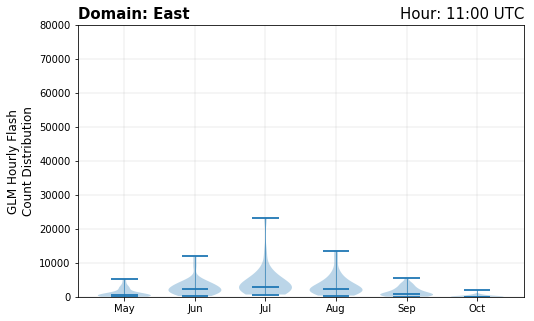

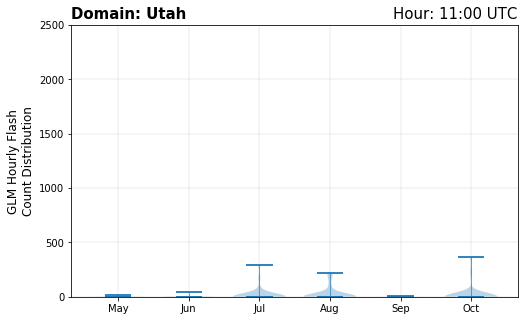

In [421]:
for n, DOMAIN in enumerate(data_dict.keys()):
    counts = [data_dict[DOMAIN][MONTH]['GLM_FLASH_COUNT'] for MONTH in data_dict[DOMAIN].keys()]
    counts = [i[~np.isnan(i)] for i in counts] # filter out nan values
    counts = np.array(counts)

    plt.figure(n, figsize=[8,5])
    plt.title("Domain: %s" % DOMAIN, loc='left', fontweight='semibold')
    plt.title('Hour: %02d:00 UTC' % hour, loc='right')
    plt.ylabel('GLM Hourly Flash\nCount Distribution')
    v = plt.violinplot(counts, showmedians=True, widths=.75);
    v['cbars'].set_linewidth(.8);
    v['cbars'].set_alpha(.8);
    plt.xticks(range(1,1+len(data_dict[DOMAIN].keys())), [datetime(2019, m, 1).strftime('%b') for m in data_dict[DOMAIN].keys()]);
    plt.grid()
    if DOMAIN == 'HRRR':
        plt.ylim([0,80000])
    elif DOMAIN == 'Utah':
        plt.ylim(0, 2500)
    else:
        plt.ylim([0,80000])
    plt.savefig(SAVEDIR+'GLM_Flash_Count_Distribtuion_%s_%02d00-UTC' % (DOMAIN, hour))

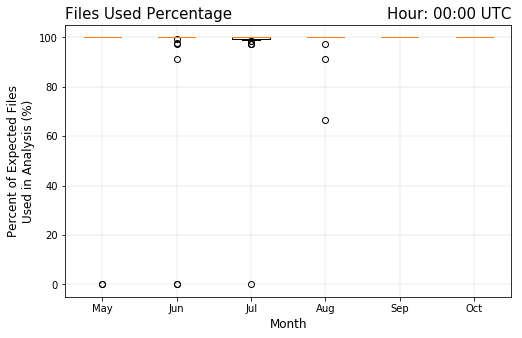

In [351]:
DOMAIN = 'HRRR'
files_present = np.array([data_dict[DOMAIN][MONTH]['NUM_FILES'] for MONTH in data_dict[DOMAIN].keys()])
files_expected = np.array([data_dict[DOMAIN][MONTH]['EXPECTED_FILES'] for MONTH in data_dict[DOMAIN].keys()])
files_percentage = [p/files_expected[i]*100 for i,p in enumerate(files_present)]

plt.figure(1, figsize=[8,5])
plt.title("Files Used Percentage", loc='left')
plt.title('Hour: %02d:00 UTC' % hour, loc='right')
plt.ylabel('Percent of Expected Files\nUsed in Analysis (%)')
plt.boxplot(files_percentage);
plt.xticks(range(1,1+len(data_dict[DOMAIN].keys())), [datetime(2019, m, 1).strftime('%b') for m in data_dict[DOMAIN].keys()]);
plt.xlabel('Month')
plt.grid()

In [366]:
print('missing hours of GLM data:', (sum([sum(i) for i in files_expected])-sum([sum(i) for i in files_present]))/180)

missing hours of GLM data: 5.7444444444444445


# HRRR Lightning Efficency Hovmoller

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if __name__ == '__main__':


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


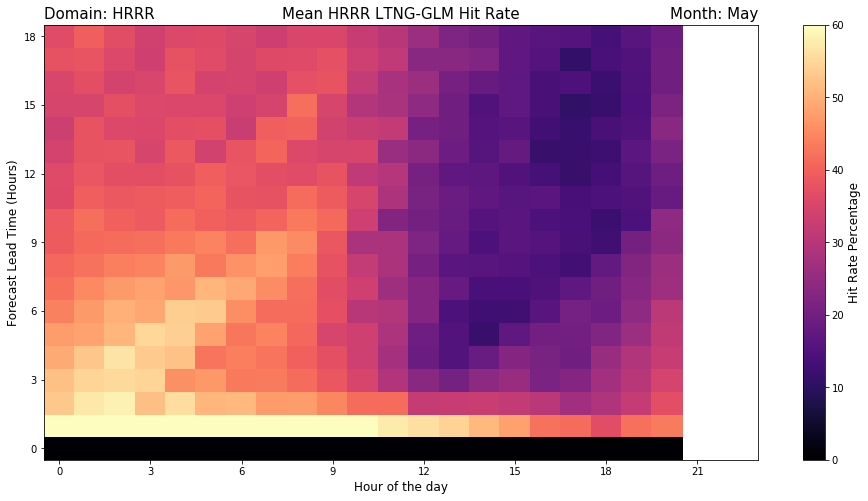

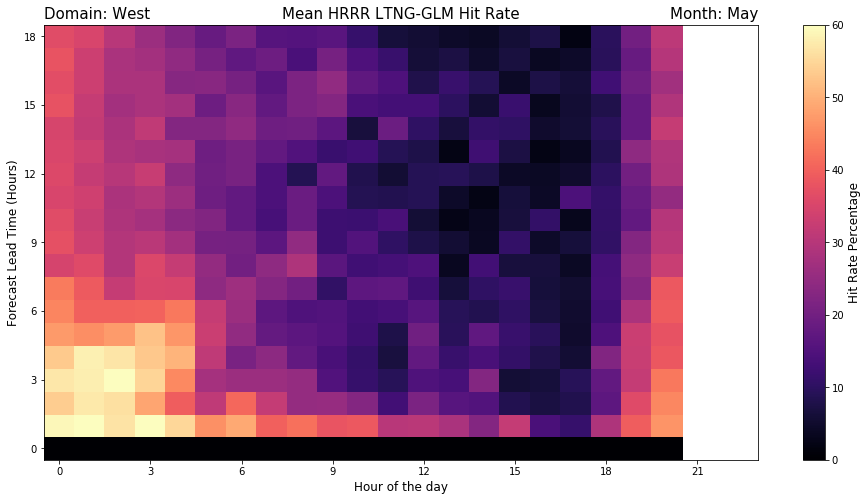

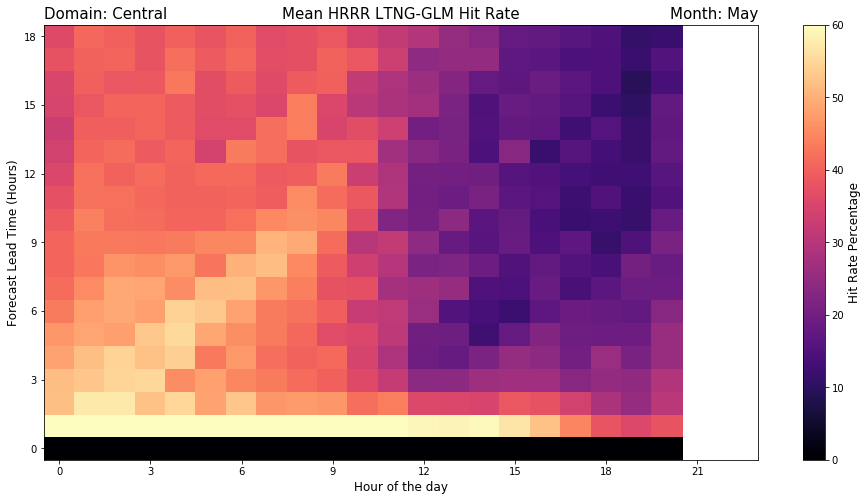

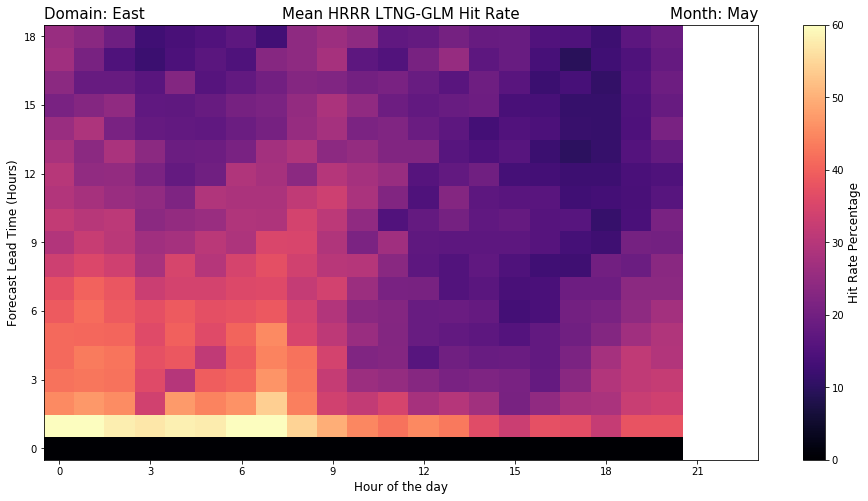

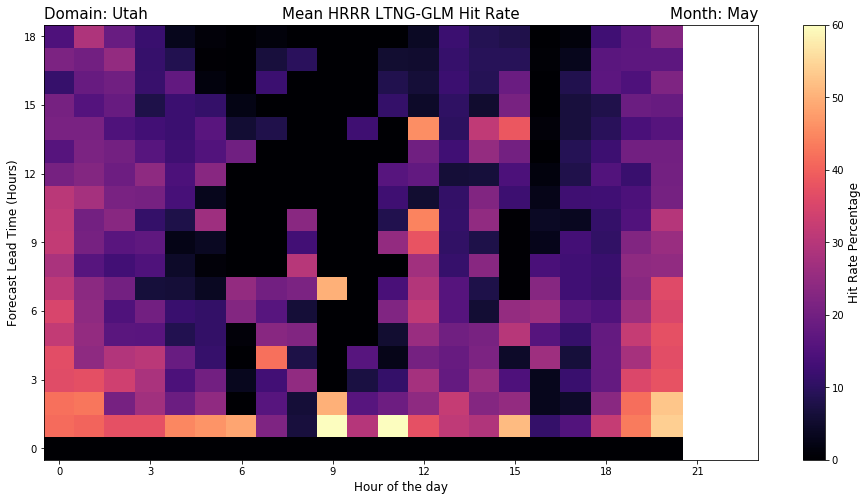

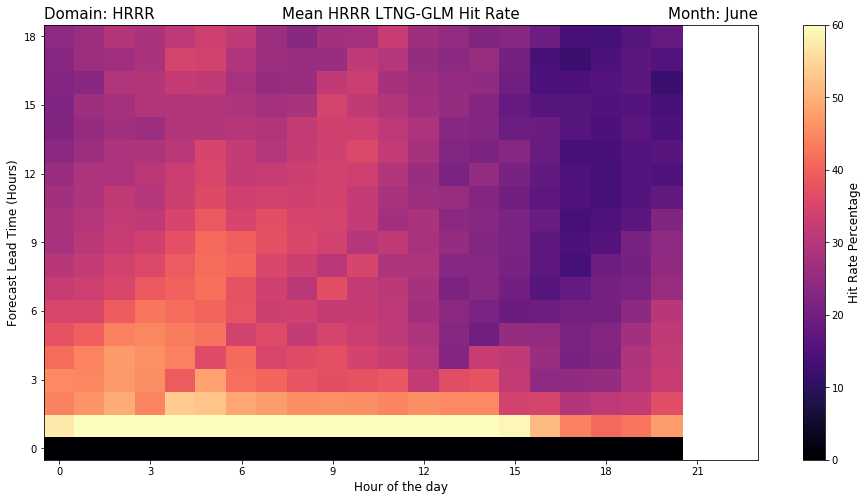

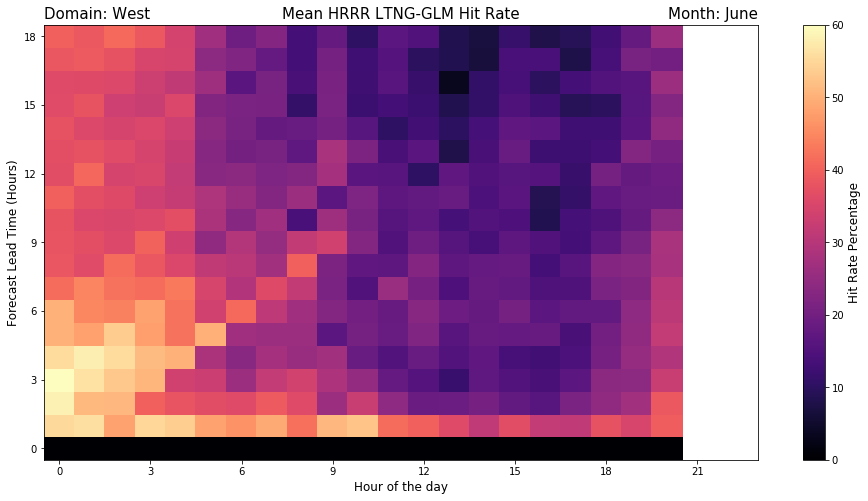

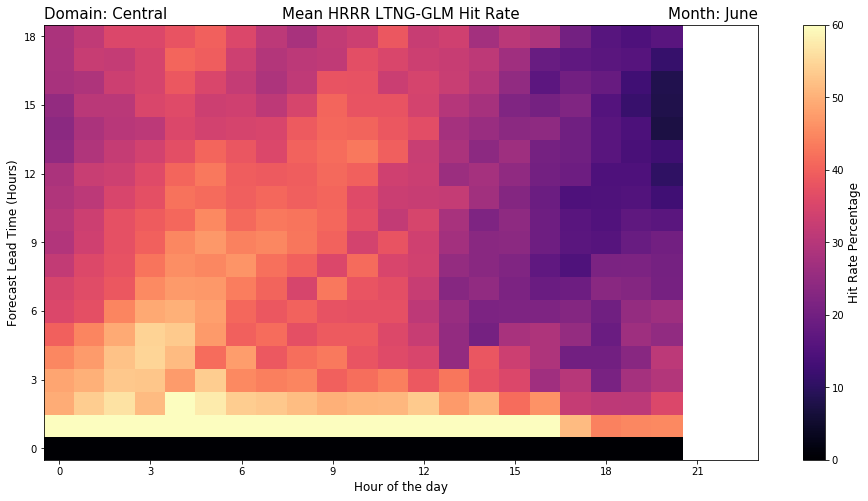

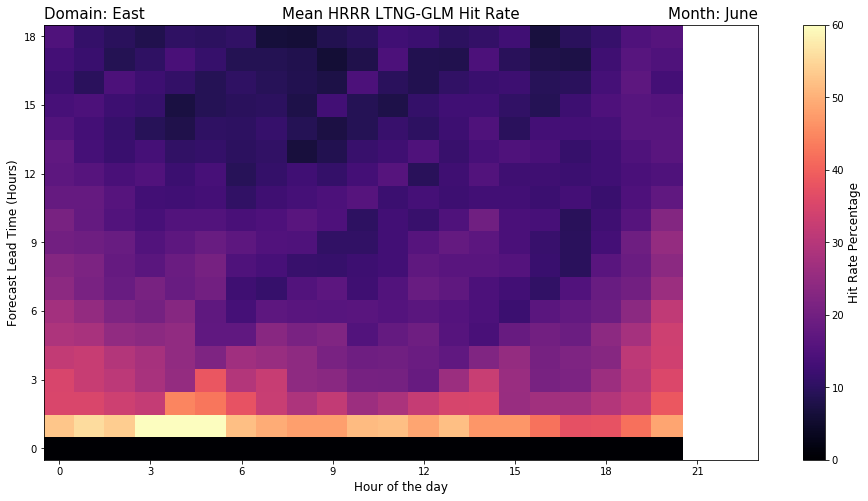

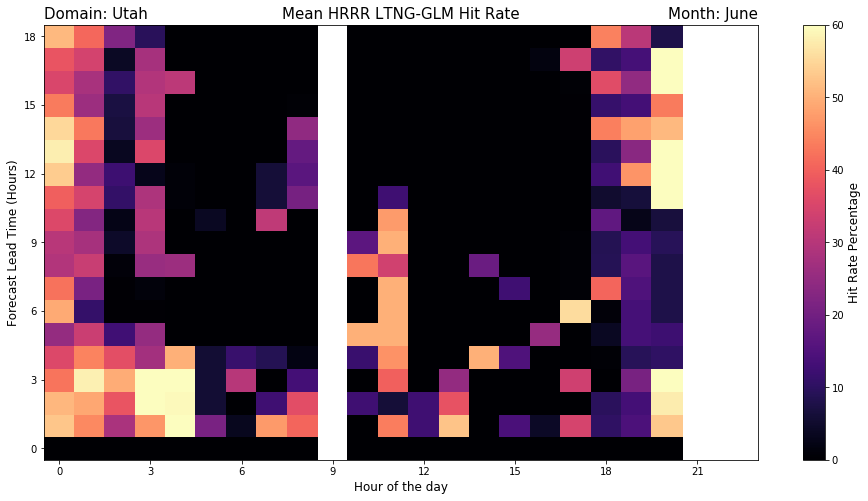

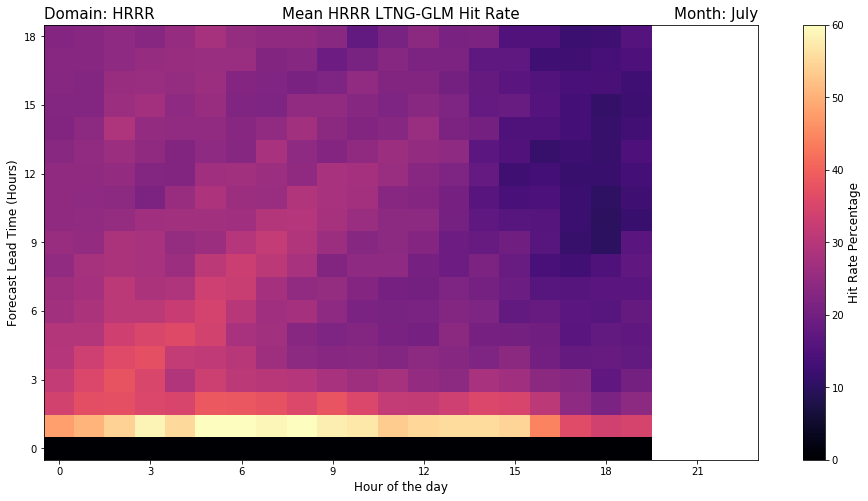

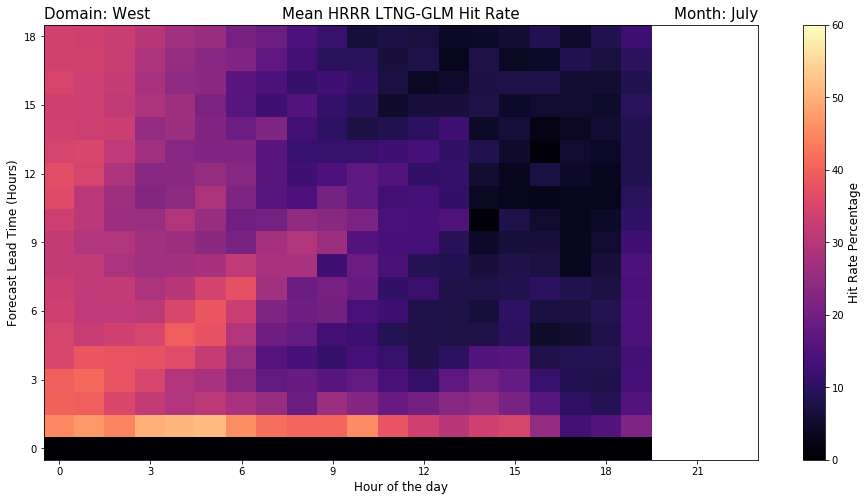

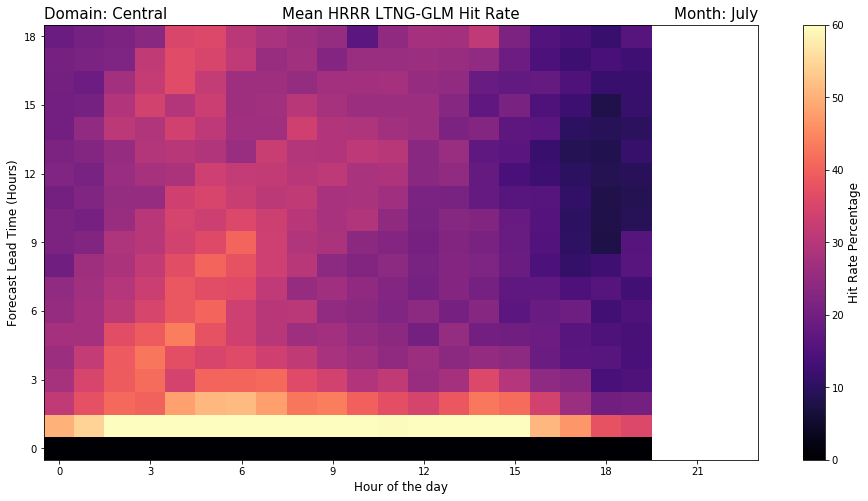

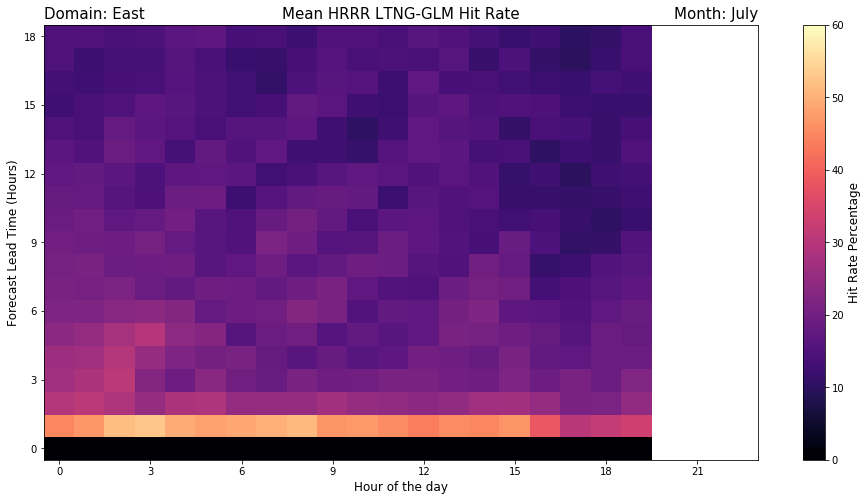

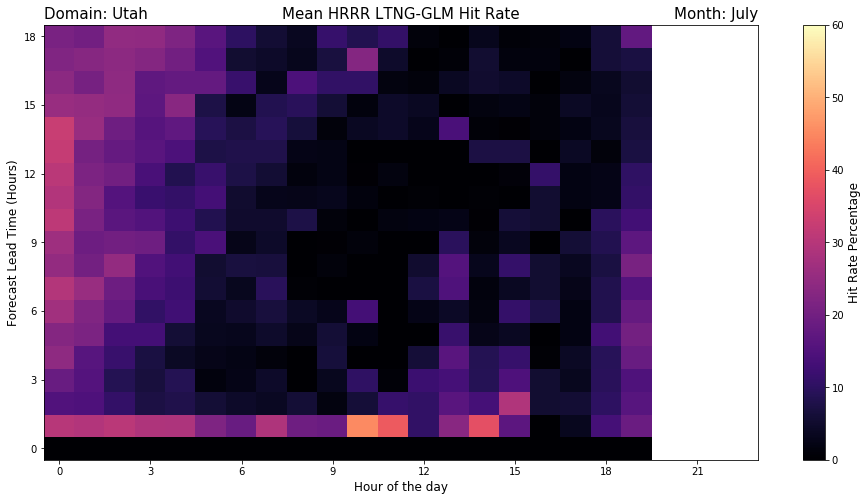

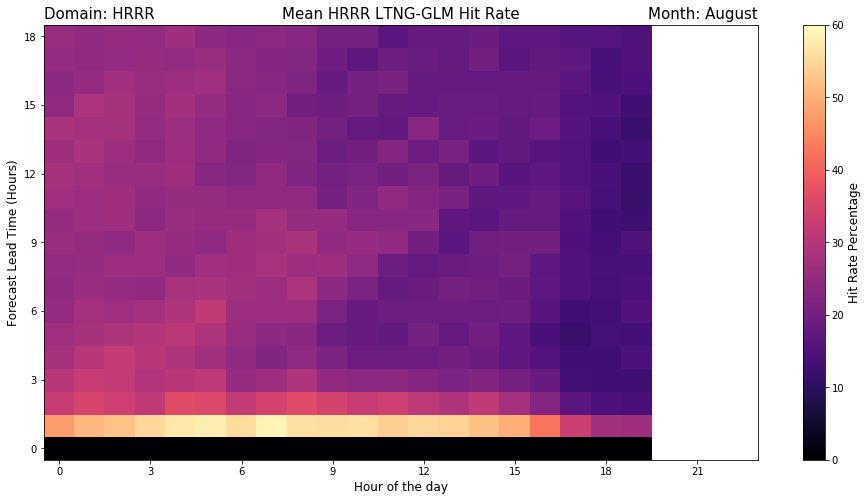

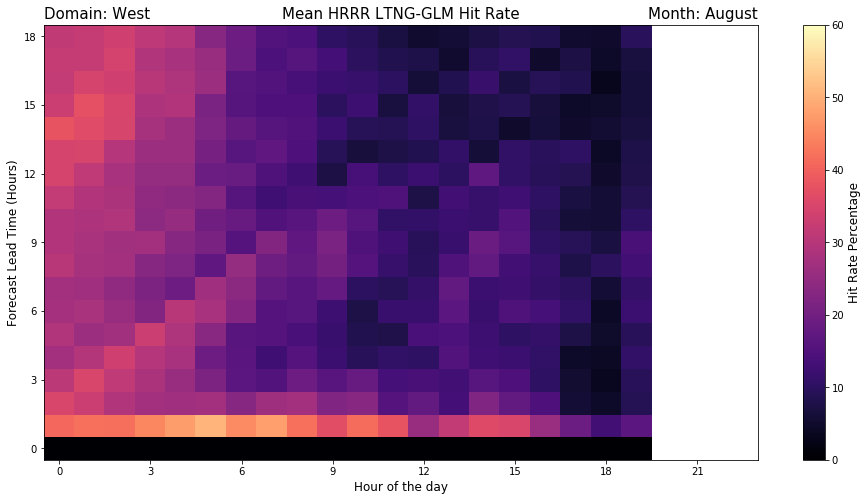

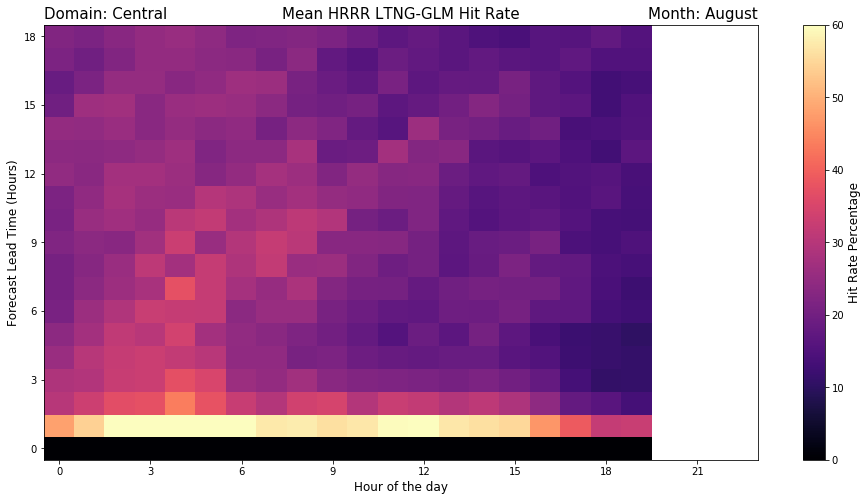

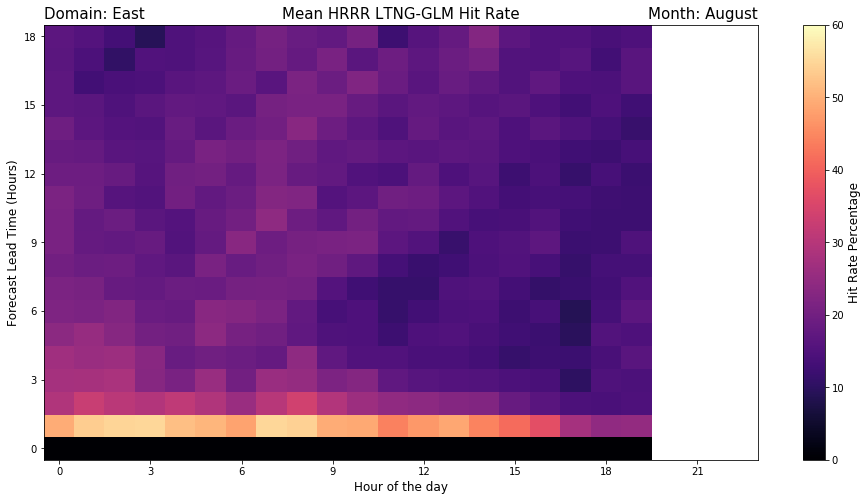

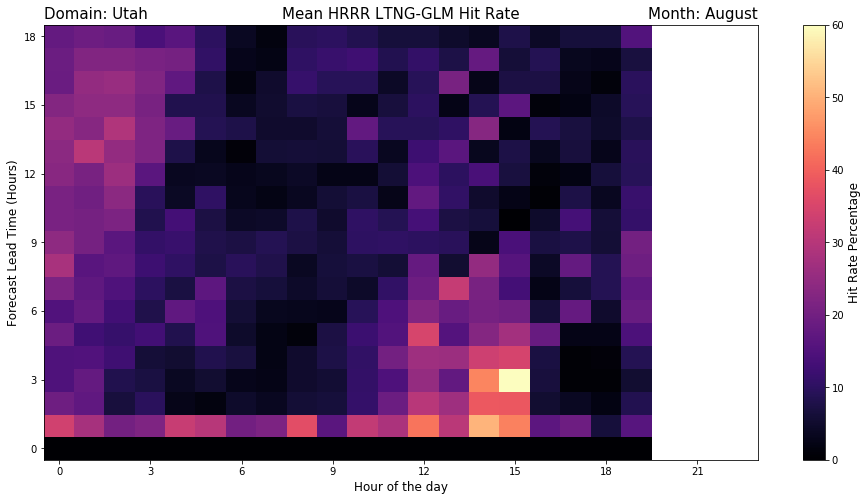

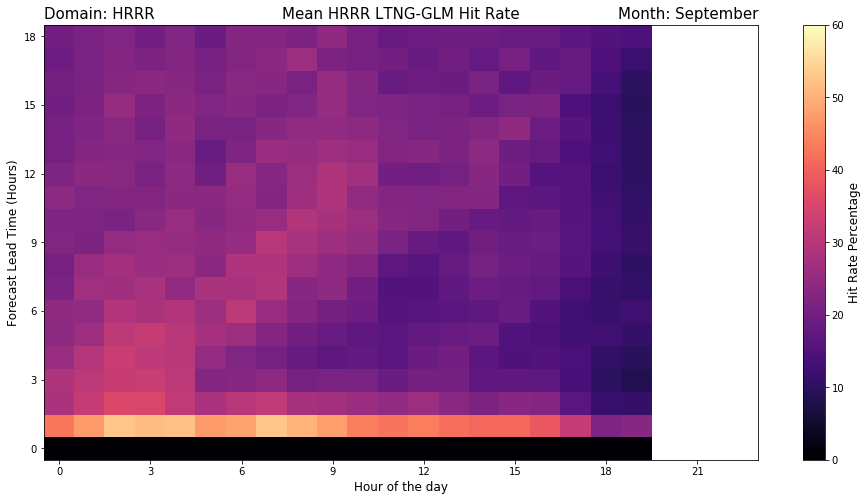

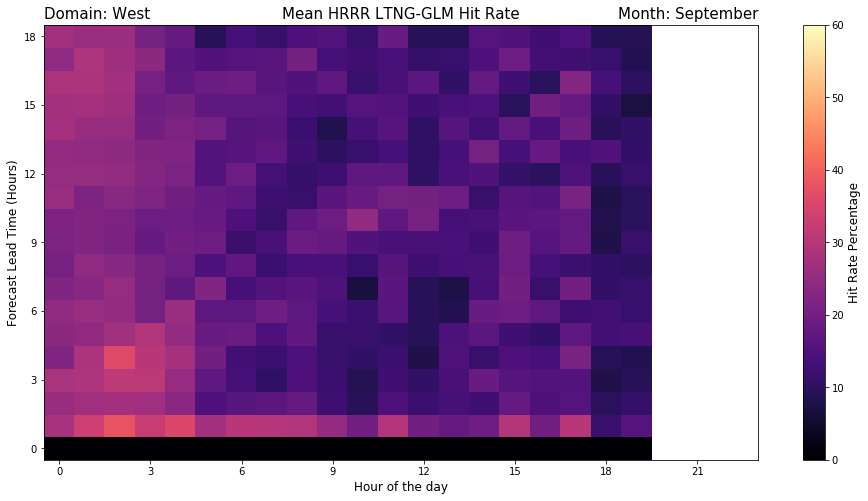

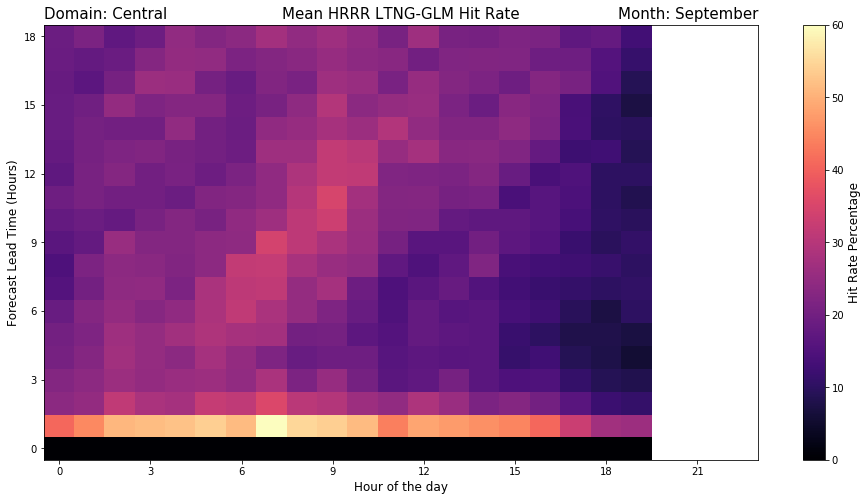

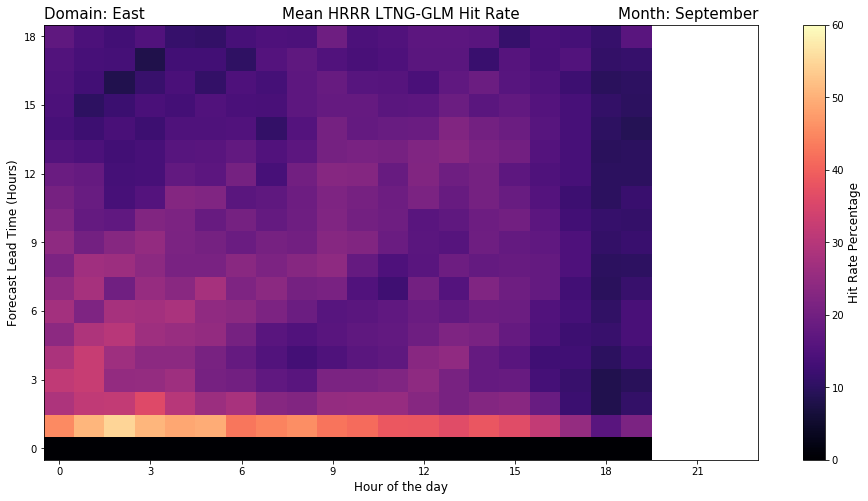

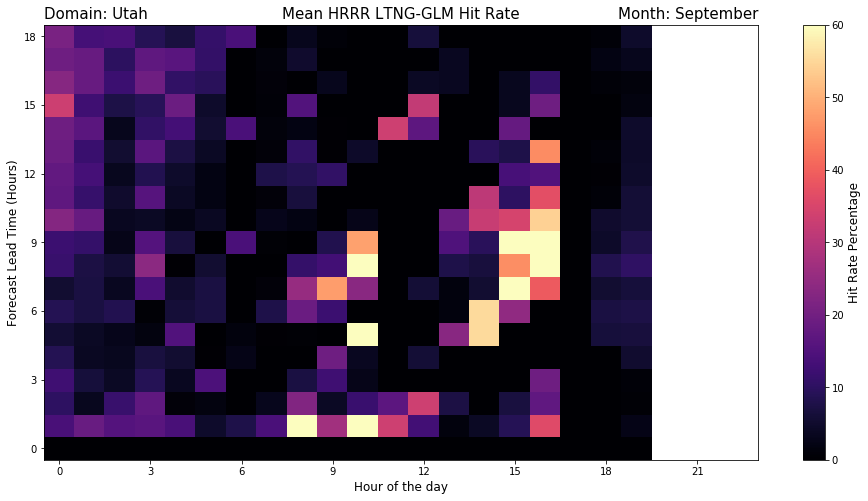

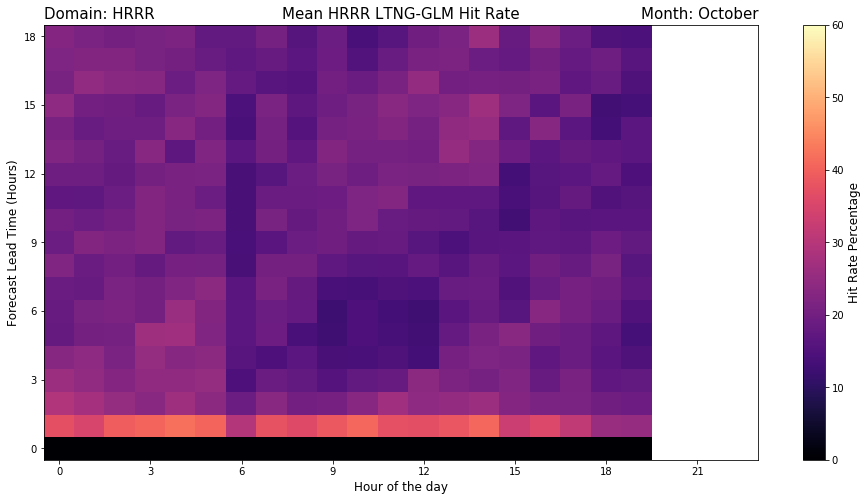

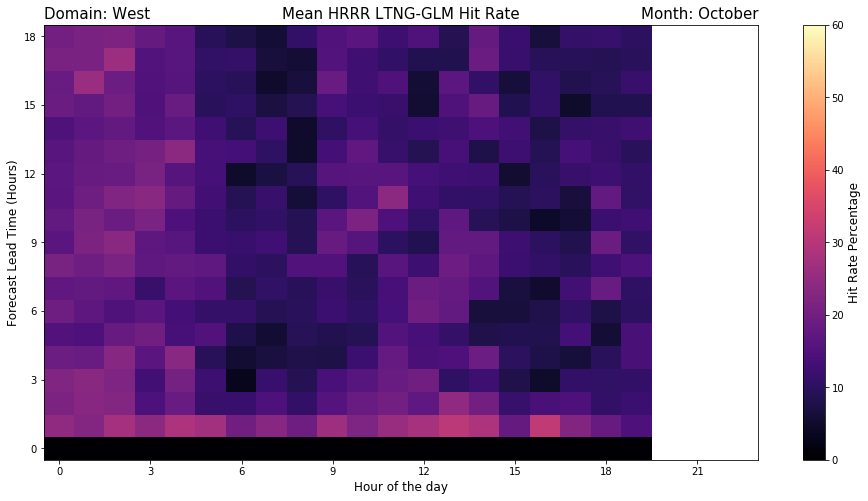

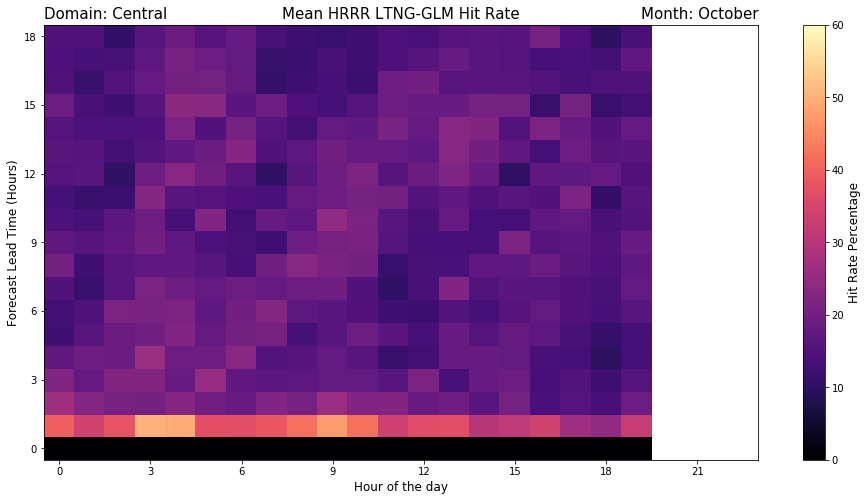

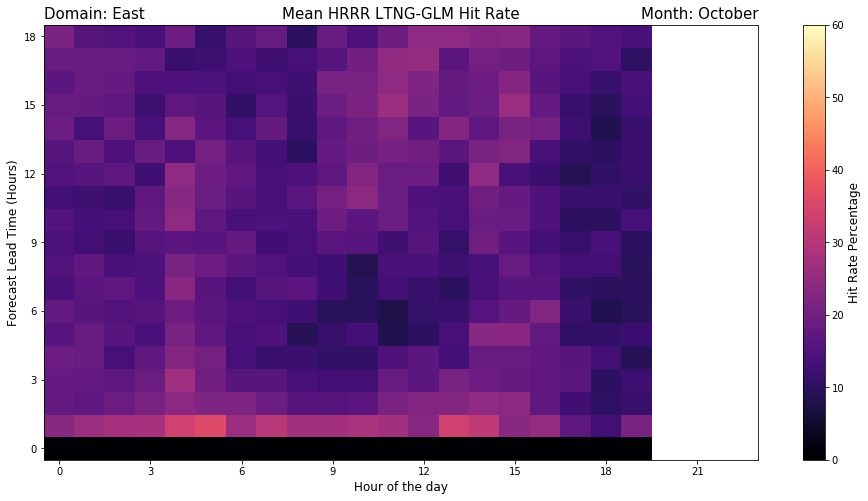

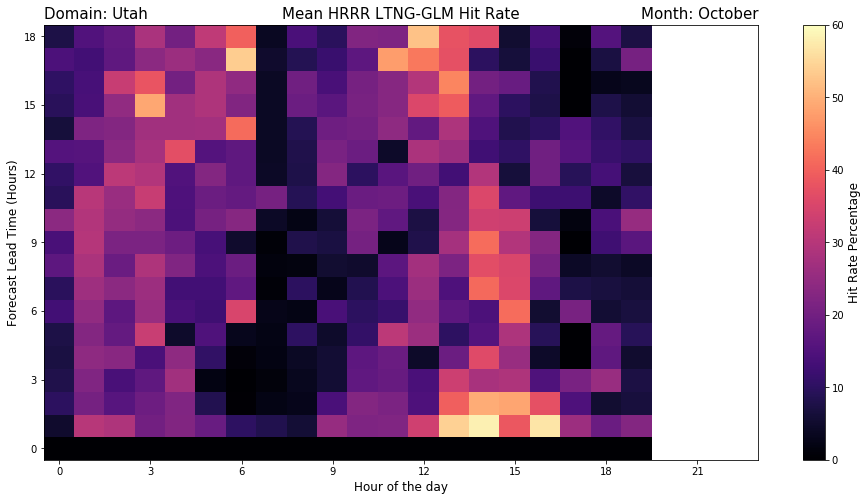

In [589]:
hours = range(0,24)
for month in range(5,11):
    for domain in ['HRRR', 'West', 'Central', 'East', 'Utah']:

        for h in hours:
            DIR = '/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/BB_HRRR/HRRR_GLM_hit_rate_data/'
            FILE = 'GLM_in_HRRR_%s_2018_m%02d_h%02d.csv' % (domain, month, h)
            if os.path.exists(DIR+FILE):
                data = np.genfromtxt(DIR+FILE, delimiter=',', names=True, dtype=None)
                if h == 0:
                    hov = np.array([np.nanmean(data['F%02d' % f]) for f in range(19)])
                    hr = np.array([h])
                else:
                    hov = np.vstack([hov, [np.nanmean(data['F%02d' % f]) for f in range(19)]])
                    hr = np.vstack([hr, h])
        hov = hov*100

        plt.figure(figsize=[16,8])
        plt.pcolormesh(np.transpose(hov), cmap='magma', vmin=0, vmax=60)
        plt.colorbar(label='Hit Rate Percentage')
        plt.xlabel('Hour of the day')
        plt.ylabel('Forecast Lead Time (Hours)')
        plt.yticks(np.arange(0.5,19,3), range(0,19,3));
        plt.xticks(np.arange(0.5,25,3), range(0,25, 3));
        plt.xlim([0,23.5])
        plt.title('Domain: %s' % domain, loc='left')
        plt.title('Mean HRRR LTNG-GLM Hit Rate')
        plt.title('Month: %s' % datetime(2018, month, 1).strftime('%B'), loc='right')
        plt.savefig(SAVEDIR + 'Hovmoller_%s_m%02d' % (domain, month))